In [56]:
#Ejercicio I,

#I)a)

import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_excel(r"C:/Users/joaqu/Documents/GitHub/Repositorio-TP-s-grupo-24/TP2/usu_individual_t124.xlsx")
df_sorted =df[df['REGION'] == 1]
df_sorted["REGION"]="Gran Buenos Aires"

#Cambio de nombre de las variables de interés:
df_sorted = df_sorted.rename(columns={'CH04': 'Sexos Relevados'})
df_sorted = df_sorted.rename(columns={'NIVEL_ED': 'Nivel Educativo'})
df_sorted = df_sorted.rename(columns={'CH08': 'Cobertura Médica'})
df_sorted = df_sorted.rename(columns={'CH07': 'Estado Civil'})
df_sorted = df_sorted.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_sorted = df_sorted.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_sorted = df_sorted.rename(columns={'CH06': "Años al momento de la encuesta"})
df_sorted = df_sorted.rename(columns={'CH09': "Sabe leer y escribir"})
df_sorted = df_sorted.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_sorted = df_sorted.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_sorted = df_sorted.rename(columns={'PP07G_59': "Sin Aguinaldo Ni V.P"})
df_sorted= df_sorted.rename(columns={'PP10D':"Trabajó en el último año"})

#Adaptación de las variables de la EPH 2024 a la EPH 2004:
df_sorted['Sexos Relevados'] = df_sorted['Sexos Relevados'].replace({1: 'Varón', 2: 'Mujer'})
df_sorted['Nivel Educativo'] = df_sorted['Nivel Educativo'].replace({1: "Primaria Incompleta (incluye educación especial)",
2: "Primaria Completa",
3: "Secundaria Incompleta",
4: "Secundaria Completa",
5: "Superior Universitaria Incompleta",
6: "Superior Universitaria Completa",
7: "Sin instrucción",
9: "Ns./ Nr."})
df_sorted['Cobertura Médica'] = df_sorted['Cobertura Médica'].replace({1:"Obra social (incluye PAMI)",2: 'Mutual / Prepaga / Servicio de emergencia',3:"Planes y seguros públicos",4:"No paga ni le descuentan",12:"Ns./Nr.",13:"Obra social y Planes y Seguros Públicos", 
                                               23:"Mutual/prepaga/servicio de emergencia/Planes y Seguros Públicos",
                                                123:"Obra social, mutual / prepaga / servicio de emergencia/Planes y Seguros Públicos"})
df_sorted['Categoría de Inactividad'] = df_sorted['Categoría de Inactividad'].replace({1: "Jubilado / Pensionado",
2: "Rentista",
3: "Estudiante",
4: "Ama de casa",
5: "Menor de 6 años",
6: "Discapacitado",
7: "Otros"})
df_sorted['Sabe leer y escribir'] = df_sorted['Sabe leer y escribir'].replace({1: "Sí",
2: "No",
3: "Menor de 2 años"})
df_sorted["Tiene Vacaciones Pagas"] = df_sorted['Tiene Vacaciones Pagas'].replace({1: "Sí",
2: "No"})
df_sorted["Cobra Aguinaldo"] = df_sorted['Cobra Aguinaldo'].replace({1: "Sí",
2: "No"})
df_sorted["Sin Aguinaldo Ni V.P"] = df_sorted['Sin Aguinaldo Ni V.P'].replace({5:"Sí"})
df_sorted['ESTADO'] = df_sorted['ESTADO'].replace({0: "Entrevista individual no realizada (no respuesta al Cuestionario Individual)",
1: "Ocupado",
2: "Desocupado",
3: "Inactivo",
4: "Menor de 10 años"})

df_sorted["Trabajó en el último año"] = df_sorted['Trabajó en el último año'].replace({1: "Sí",
2: "No"})

df_sorted["Estado Civil"] = df_sorted['Estado Civil'].replace({1: "unido?",
2: "casado?",
3: "separado/a ó divorciado/a?",
4: "viudo/a?",
5: "soltero/a?"})

C:\Users\joaqu\AppData\Local\Temp\ipykernel_21648\185403395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted["REGION"]="Gran Buenos Aires"


In [58]:
#Cambio de nombre de las variables de interés de la EPH de 2004, 
#Así ,las columnas tienen en los dos registros el mismo nombre
df_1=pd.read_stata("usu_individual_T104.dta")
df_1=df_1.rename(columns={'ch04': 'Sexos Relevados'})
df_1= df_1.rename(columns={'region':'REGION'})
df_1=df_1[df_1['REGION'] == "Gran Buenos Aires"]
df_1= df_1.rename(columns={'ano4':'ANO4'})
df_1= df_1.rename(columns={'nivel_ed':'Nivel Educativo'})
df_1= df_1.rename(columns={'ch07':'Estado Civil'})
df_1= df_1.rename(columns={'ch08':'Cobertura Médica'})
df_1= df_1.rename(columns={"cat_inac":'Categoría de Inactividad'})
df_1= df_1.rename(columns={'ipcf':"Ingreso Per Cápita Familiar"})
df_1= df_1.rename(columns={'ch06':"Años al momento de la encuesta"})
df_1= df_1.rename(columns={'ch09':"Sabe leer y escribir"})
df_1= df_1.rename(columns={'pp07g1':"Tiene Vacaciones Pagas"})
df_1= df_1.rename(columns={'pp07g2':"Cobra Aguinaldo"})
df_1= df_1.rename(columns={'estado':"ESTADO"})
df_1= df_1.rename(columns={'pp10d':"Trabajó en el último año"})
df_1= df_1.rename(columns={'pp07g_59':"Sin Aguinaldo Ni V.P"})
df_1["Sin Aguinaldo Ni V.P"] = df_1["Sin Aguinaldo Ni V.P"].replace({1:"Sí"})


In [60]:
df_2=df_1.filter(["Sexos Relevados","REGION","ANO4","Nivel Educativo","Estado Civil","Cobertura Médica","Categoría de Inactividad","Ingreso Per Cápita Familiar","Años al momento de la encuesta","Sabe leer y escribir",
"Tiene Vacaciones Pagas",
"Cobra Aguinaldo",
"ESTADO",
"Trabajó en el último año",
"Sin Aguinaldo Ni V.P"])
df_3=df_sorted.filter(["Sexos Relevados","REGION","ANO4","Nivel Educativo","Estado Civil","Cobertura Médica","Categoría de Inactividad","Ingreso Per Cápita Familiar","Años al momento de la encuesta","Sabe leer y escribir",
"Tiene Vacaciones Pagas",
"Cobra Aguinaldo",
"ESTADO",
"Trabajó en el último año",
"Sin Aguinaldo Ni V.P"])

In [62]:
#Se unen ambos dataframes para hacer la comparación entre registros

juntas_df=pd.merge(df_2,df_3,how="outer")
juntas_df["Ingreso Per Cápita Familiar"] = juntas_df["Ingreso Per Cápita Familiar"].apply(round)
juntas_df["ANO4"] = juntas_df["ANO4"].apply(round)
juntas_df = juntas_df.replace(0.0, np.nan)

juntas_df

,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer y escribir,Tiene Vacaciones Pagas,Cobra Aguinaldo,ESTADO,Trabajó en el último año,Sin Aguinaldo Ni V.P
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,736.0,59.0,Sí,NaN,NaN,Ocupado,NaN,NaN
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3416.0,46.0,Sí,NaN,NaN,Ocupado,NaN,NaN
2,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,50.0,68.0,Sí,NaN,NaN,Inactivo,NaN,NaN
3,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200.0,54.0,Sí,NaN,NaN,Inactivo,NaN,NaN
4,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200.0,61.0,Sí,NaN,NaN,Inactivo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Ama de casa,46667.0,45,Sí,NaN,NaN,Inactivo,NaN,NaN
14694,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Jubilado / Pensionado,359000.0,91,Sí,NaN,NaN,Inactivo,NaN,NaN
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61,Sí,Sí,Sí,Ocupado,NaN,NaN
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68,Sí,NaN,NaN,Ocupado,NaN,NaN


In [25]:
#I)b) Tabla con cantidad de NaN por año

#Se cuentan los NaN por columna
nan_por_columna= juntas_df.isna().sum()
maximo_de_nan = nan_por_columna.max()

#Se evalúa cuáles son las columnas con más NaN de toda la muestra
top_5_nan = nan_por_columna.sort_values(ascending=False).head(15)

#Se cuentan los NaN por año
nan_por_ano= juntas_df.groupby('ANO4').apply(lambda x: x.isna().sum().sum())

nan_anual = nan_por_ano.reset_index(name='NaN por año')
nan_anual= nan_anual.rename(columns={'ANO4':"Año"})
print(top_5_nan)
nan_anual

Trabajó en el último año          14159
Sin Aguinaldo Ni V.P              13150
Tiene Vacaciones Pagas            10007
Cobra Aguinaldo                   10007
Categoría de Inactividad           7193
Ingreso Per Cápita Familiar        3134
Sexos Relevados                       0
REGION                                0
ANO4                                  0
Nivel Educativo                       0
Estado Civil                          0
Cobertura Médica                      0
Años al momento de la encuesta        0
Sabe leer y escribir                  0
ESTADO                                0
dtype: int64


C:\Users\joaqu\AppData\Local\Temp\ipykernel_10192\2630943090.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_por_ano= juntas_df.groupby('ANO4').apply(lambda x: x.isna().sum().sum())


,Año,NaN por año
0,2004,28392
1,2024,29258


In [27]:
print(nan_por_columna)

Sexos Relevados                       0
REGION                                0
ANO4                                  0
Nivel Educativo                       0
Estado Civil                          0
Cobertura Médica                      0
Categoría de Inactividad           7193
Ingreso Per Cápita Familiar        3134
Años al momento de la encuesta        0
Sabe leer y escribir                  0
Tiene Vacaciones Pagas            10007
Cobra Aguinaldo                   10007
ESTADO                                0
Trabajó en el último año          14159
Sin Aguinaldo Ni V.P              13150
dtype: int64


NameError: name 'legend' is not defined

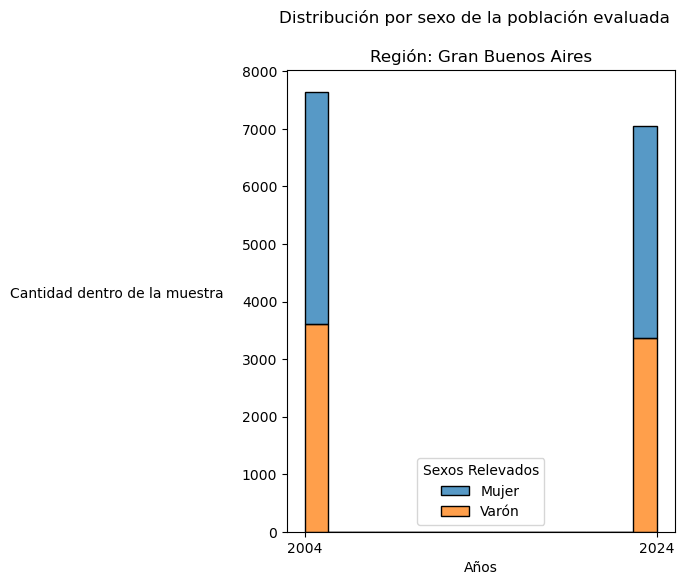

In [29]:
#Sección II, Ejercicio 3)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
ax=sns.histplot(data=juntas_df, x="ANO4", stat='count', hue="Sexos Relevados", multiple="stack") 
plt.suptitle("Distribución por sexo de la población evaluada")
plt.title("Región: Gran Buenos Aires")
plt.xlabel("Años")
plt.ylabel("Cantidad dentro de la muestra",rotation=0, labelpad=90)
plt.xticks([2004, 2024])
legend.set_title(None)
ax.get_legend()

In [31]:
#Parte III,Punto 6:

#Se definen los DF respondieron y no_respondieron
no_respondieron =juntas_df[juntas_df['ESTADO'] == "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]
respondieron =juntas_df[juntas_df['ESTADO']!= "Entrevista individual no realizada (no respuesta al Cuestionario Individual)"]

#Número de personas que no respondieron su condicion de actividad
a_contar="Entrevista individual no realizada (no respuesta al Cuestionario Individual)"
contar_por_columna=(no_respondieron['ESTADO']== "Entrevista individual no realizada (no respuesta al Cuestionario Individual)").sum()
print(f" En total ,entre la EPH del primer trimestre 2004 y la del primer trimestre de 2024, {contar_por_columna} personas no indicaron su condición de actividad") 

 En total ,entre la EPH del primer trimestre 2004 y la del primer trimestre de 2024, 41 personas no indicaron su condición de actividad


In [33]:
#Parte III, Punto 7:
#Se define la columna PEA
def ev_pea(ESTADO):
    if ESTADO == "Ocupado":
        PEA = 1
    elif ESTADO == "Desocupado":
        PEA = 0
    else: PEA= "otro"
    return PEA
respondieron["PEA"]=respondieron["ESTADO"].apply(ev_pea)
respondieron=respondieron[(respondieron["PEA"]==1)|(respondieron["PEA"]==0)]
respondieron

C:\Users\joaqu\AppData\Local\Temp\ipykernel_10192\1307155144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["PEA"]=respondieron["ESTADO"].apply(ev_pea)


,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer y escribir,Tiene Vacaciones Pagas,Cobra Aguinaldo,ESTADO,Trabajó en el último año,Sin Aguinaldo Ni V.P,PEA
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,736.0,59.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3416.0,46.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1
14,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,48.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1
15,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,51.0,Sí,NaN,NaN,Desocupado,Sí,NaN,0
16,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,52.0,Sí,NaN,NaN,Desocupado,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,805000.0,50,Sí,Sí,Sí,Ocupado,NaN,NaN,1
14692,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,1285000.0,37,Sí,Sí,Sí,Ocupado,NaN,NaN,1
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61,Sí,Sí,Sí,Ocupado,NaN,NaN,1
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68,Sí,NaN,NaN,Ocupado,NaN,NaN,1


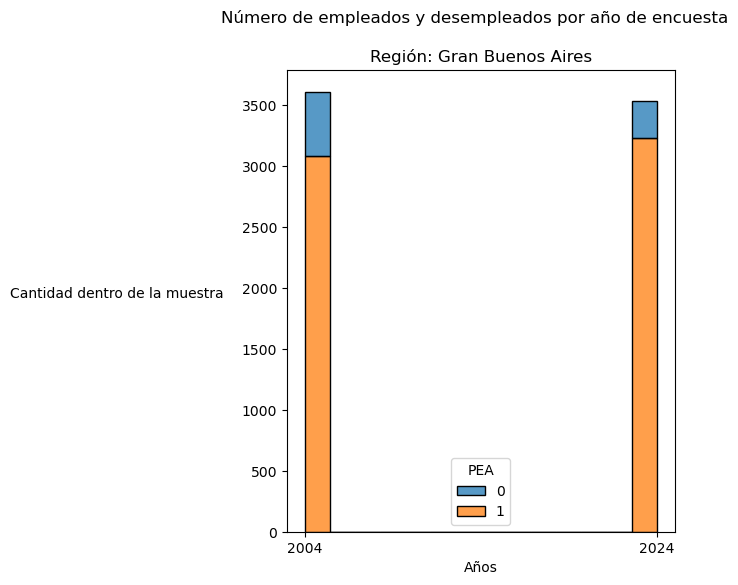

In [35]:
#Gráfico de barras sobre la cantidad de ocupados y desocupados en cada año
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
ax=sns.histplot(data=respondieron, x="ANO4", stat='count', hue="PEA", multiple="stack") 
plt.suptitle("Número de empleados y desempleados por año de encuesta")
plt.title("Región: Gran Buenos Aires")
plt.xlabel("Años")
plt.ylabel("Cantidad dentro de la muestra",rotation=0, labelpad=90)
plt.xticks([2004, 2024])
ax.get_legend()

In [37]:
#Parte III, Punto 8:

# Asegurarse de que la columna sea de tipo numérico
respondieron["Años al momento de la encuesta"] = pd.to_numeric(respondieron["Años al momento de la encuesta"], errors='coerce')

# Eliminar filas con valores no válidos (NaN) después de la conversión
respondieron = respondieron.dropna(subset=["Años al momento de la encuesta"])

#Se define la columna PET
def ev_pet(edad):
    if 15 <= edad <= 65:
        return 1
    else:
        return 0

respondieron["PET"] = respondieron["Años al momento de la encuesta"].apply(ev_pet)
respondieron = respondieron[(respondieron["PET"] == 1) | (respondieron["PET"] == 0)]
respondieron

C:\Users\joaqu\AppData\Local\Temp\ipykernel_10192\1440960567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["PET"] = respondieron["Años al momento de la encuesta"].apply(ev_pet)


,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer y escribir,Tiene Vacaciones Pagas,Cobra Aguinaldo,ESTADO,Trabajó en el último año,Sin Aguinaldo Ni V.P,PEA,PET
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,736.0,59.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3416.0,46.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1
14,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,48.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1
15,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,51.0,Sí,NaN,NaN,Desocupado,Sí,NaN,0,1
16,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,52.0,Sí,NaN,NaN,Desocupado,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,805000.0,50.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1
14692,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,1285000.0,37.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,0


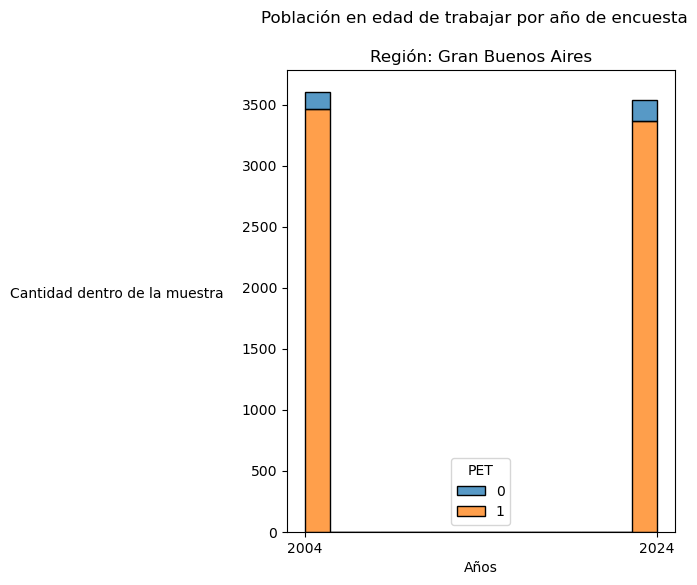

In [39]:
#Gráfico de barras sobre la cantidad de poblacion en edad para trabajar en cada año
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
ax=sns.histplot(data=respondieron, x="ANO4", stat='count', hue="PET", multiple="stack") 
plt.suptitle("Población en edad de trabajar por año de encuesta")
plt.title("Región: Gran Buenos Aires")
plt.xlabel("Años")
plt.ylabel("Cantidad dentro de la muestra",rotation=0, labelpad=90)
plt.xticks([2004, 2024])
ax.get_legend()


In [41]:
#Parte III, Punto 9:
def ev_desocupado(ESTADO):
    if ESTADO == "Desocupado":
        desocupado = 1
    elif ESTADO == "Ocupado":
        desocupado = 0
    else: desocupado= "otro"
    return desocupado
respondieron["desocupado"]=respondieron["ESTADO"].apply(ev_desocupado)
respondieron=respondieron[(respondieron["desocupado"]==1)|(respondieron["desocupado"]==0)]
respondieron

,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer y escribir,Tiene Vacaciones Pagas,Cobra Aguinaldo,ESTADO,Trabajó en el último año,Sin Aguinaldo Ni V.P,PEA,PET,desocupado
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,736.0,59.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1,0
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,NaN,3416.0,46.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1,0
14,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,48.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,1,0
15,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,51.0,Sí,NaN,NaN,Desocupado,Sí,NaN,0,1,1
16,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,No paga ni le descuentan,NaN,NaN,52.0,Sí,NaN,NaN,Desocupado,NaN,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14691,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,805000.0,50.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1,0
14692,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),NaN,1285000.0,37.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1,0
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,61.0,Sí,Sí,Sí,Ocupado,NaN,NaN,1,1,0
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),NaN,NaN,68.0,Sí,NaN,NaN,Ocupado,NaN,NaN,1,0,0


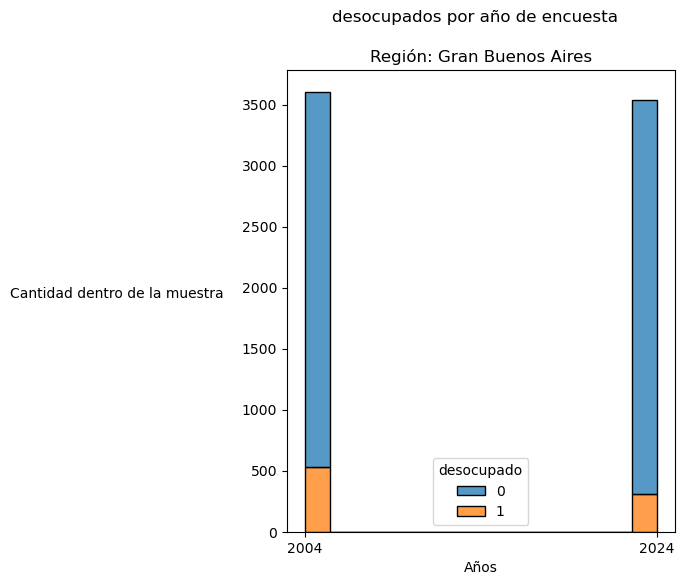

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
ax=sns.histplot(data=respondieron, x="ANO4", stat='count', hue="desocupado", multiple="stack") 
plt.suptitle("desocupados por año de encuesta")
plt.title("Región: Gran Buenos Aires")
plt.xlabel("Años")
plt.ylabel("Cantidad dentro de la muestra",rotation=0, labelpad=90)
plt.xticks([2004, 2024])
ax.get_legend()

In [75]:
def ev_desocupado(ESTADO):
    if ESTADO == "Desocupado":
        return 1
    elif ESTADO == "Ocupado":
        return 0
    else:
        return None

# Crear la columna "desocupado"
juntas_df["desocupado"] = juntas_df["ESTADO"].apply(ev_desocupado)

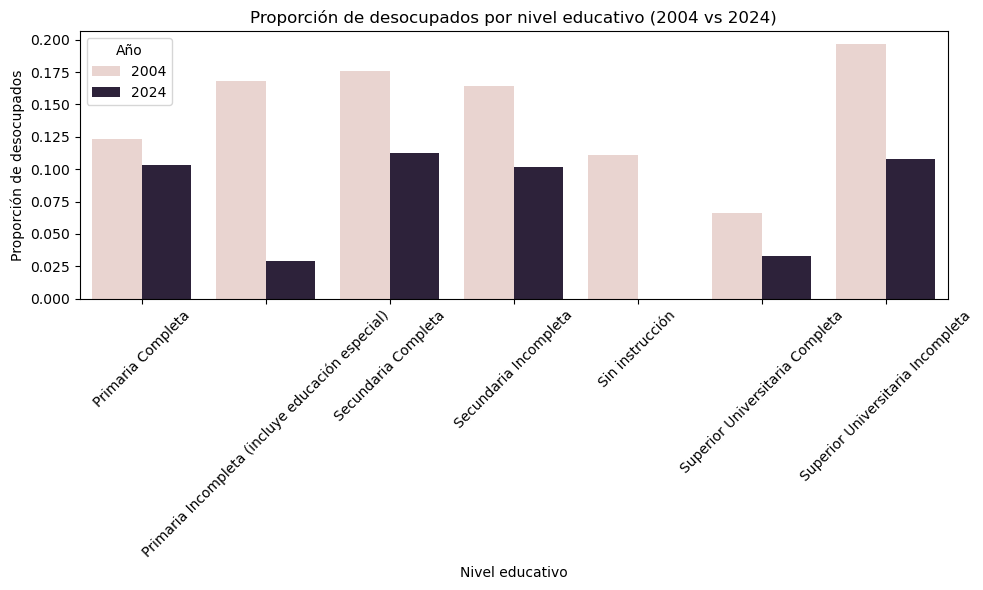

In [79]:
#ejercicio 9, parte a
# Calcular la proporción de desocupados por nivel educativo en 2004 y 2024
proporcion_por_educacion = (
    juntas_df
    .groupby(["ANO4", "Nivel Educativo"])["desocupado"]
    .mean()
    .reset_index()
)

# Visualización de los resultados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=proporcion_por_educacion, 
    x="Nivel Educativo", 
    y="desocupado", 
    hue="ANO4"
)
plt.title('Proporción de desocupados por nivel educativo (2004 vs 2024)')
plt.ylabel('Proporción de desocupados')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

In [129]:
juntas_df["años al momento de la encuesta"] = pd.to_numeric(
    juntas_df["años al momento de la encuesta"], errors="coerce"
)

C:\Users\joaqu\AppData\Local\Temp\ipykernel_10192\4255797332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juntas_df["años al momento de la encuesta"] = pd.to_numeric(


In [131]:
juntas_df = juntas_df.dropna(subset=["años al momento de la encuesta"])

In [133]:
juntas_df["Grupo Edad"] = pd.cut(
    juntas_df["años al momento de la encuesta"], 
    bins=range(0, 101, 10),  # Intervalos de 10 años
    right=False,             # Intervalos semiabiertos: [0, 10), [10, 20), etc.
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
)

C:\Users\joaqu\AppData\Local\Temp\ipykernel_10192\792951554.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["ANO4", "Grupo Edad"])["desocupado"]


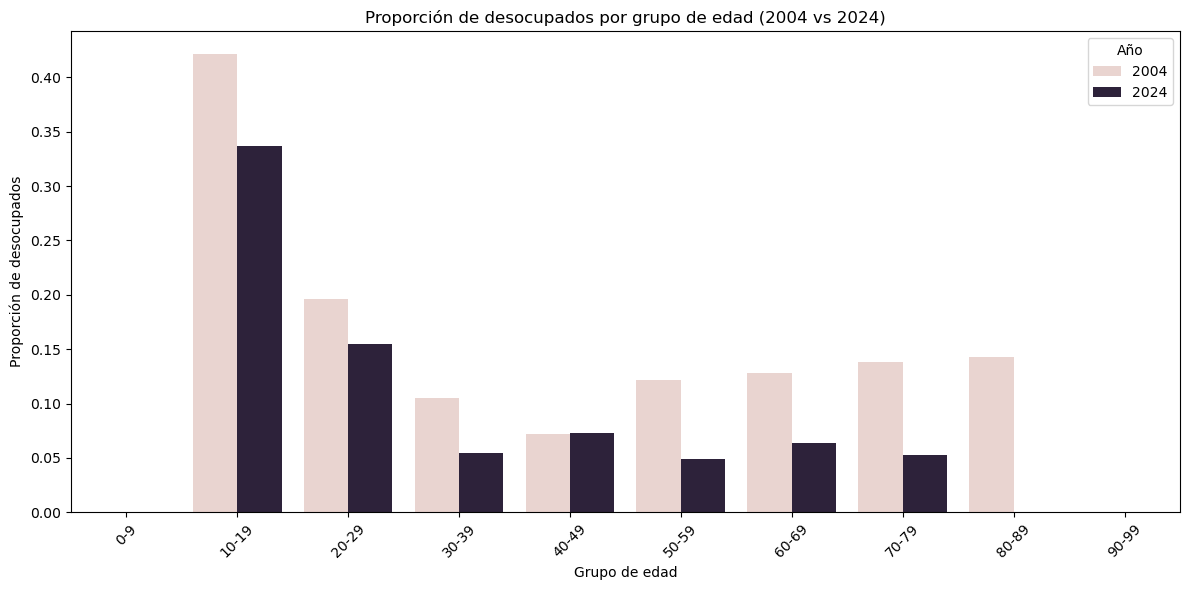

In [135]:
#ejercicio 9, parte b
# Calcular la proporción de desocupados por grupo de edad y año
proporcion_por_edad = (
    juntas_df
    .groupby(["ANO4", "Grupo Edad"])["desocupado"]
    .mean()
    .reset_index()
)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=proporcion_por_edad,
    x="Grupo Edad",
    y="desocupado",
    hue="ANO4"
)
plt.title("Proporción de desocupados por grupo de edad (2004 vs 2024)")
plt.ylabel("Proporción de desocupados")
plt.xlabel("Grupo de edad")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

Resumen de diferencias entre 2004 y 2024:
sabe_leer_escribir    No
ANO4                    
2004                7647
2024                7051


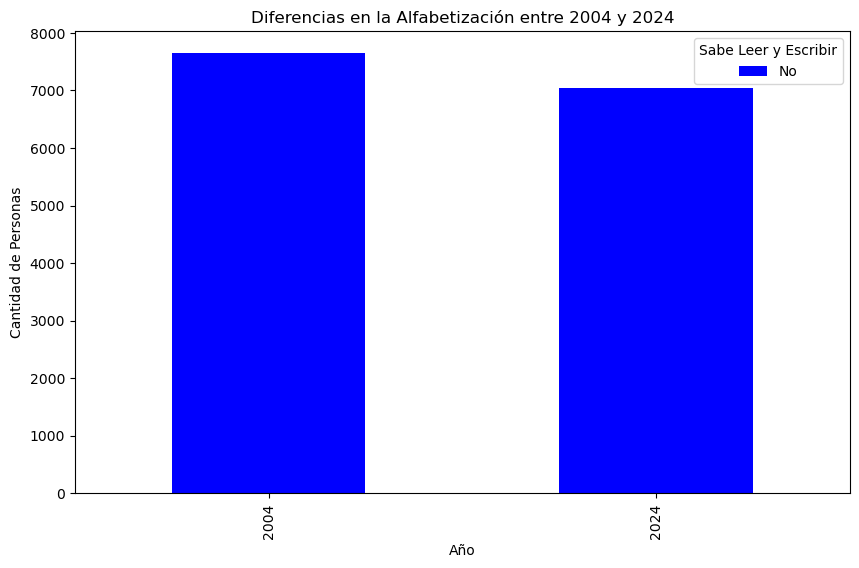

In [72]:
#ejercicio 9, parte c
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener los datos en 'juntas_df'

# Crear una nueva variable categórica para 'sabe_leer_escribir'
juntas_df['sabe_leer_escribir'] = juntas_df['Sabe leer y escribir'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Filtrar los años de interés
datos_2004_2024 = juntas_df[juntas_df['ANO4'].isin([2004, 2024])]

# Agrupar por año y sabe_leer_escribir
resumen = datos_2004_2024.groupby(['ANO4', 'sabe_leer_escribir']).size().unstack()

# Mostrar el resumen
print("Resumen de diferencias entre 2004 y 2024:")
print(resumen)

# Graficar las diferencias
resumen.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Diferencias en la Alfabetización entre 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sabe Leer y Escribir')
plt.show()